In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree


Decision Tree Algorithum

> The decision tree algorithum will automatically select the best variable to split

> Firstly, you can select the gini index or node impurity as the metric to imporve the model's performance

> Then, you continue the spliting process until there is no observation to split or no imporvement on the selected metric

> This the greedy algorithum until no imporvement made. You can simply visualize the decision tree and understand how it works.

```Python
# Code to Generate the data and also available in CSV

x1 = pd.DataFrame({'Chest Pain': ['No']*144 + ['Yes']*159,
                  'Heart Disease': ['Yes']*105 + ['No']*39+['Yes']*34+['No']*125})

x2 = pd.DataFrame({'Good Blood Circulation': ['No']*(37+127) + ['Yes']*133,
                  'Heart Disease': ['Yes']*37 + ['No']*127+['Yes']*100+['No']*33})

x3 = pd.DataFrame({'Blocked Arteries': ['No']*(45+129) + ['Yes']*(92+31),
                  'Heart Disease': ['Yes']*45 + ['No']*129+['Yes']*92+['No']*31})

pd.concat([x1,x2,x3],join='inner',axis=1)
```

In [2]:
data = pd.read_csv('data.csv')
cols = data.columns

data = pd.get_dummies(data, cols, drop_first = True)
data.columns = cols

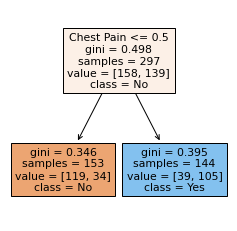

In [3]:
X = data[['Chest Pain']]
y= data[['Heart Disease']]

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

fig = plt.figure(figsize=(4,4))
_ = tree.plot_tree(model, feature_names = X.columns, class_names = ['No', 'Yes'], filled = True)

\begin{equation*}
Gini  =   \sum_{i=1}^n P(i) \times (1 - P(i))
\end{equation*}


**left leaf**

\begin{equation*}
Gini  =   1 - (\frac{119}{(119+34)})^2  - (\frac{34}{(34+119)})^2 
      = 0.3456
\end{equation*}

**right leaf**

\begin{equation*}
Gini  =   1 - (\frac{105}{(105+39)})^2  - (\frac{39}{(39+105)})^2 
      = 0.3949
\end{equation*}

**root**

\begin{equation*}
Gini  =   1 - (\frac{158}{(158+139)})^2  - (\frac{139}{(139+158)})^2 
      = 0.498
\end{equation*}

#### **Key idea**

**1. Calculate all of the Gini Impurity Score for all of the three variables**

**2. if the node has the lowest Gini Impurity Score or other spliting criteria is meet, there is no need to split further it becomes a leaf node**



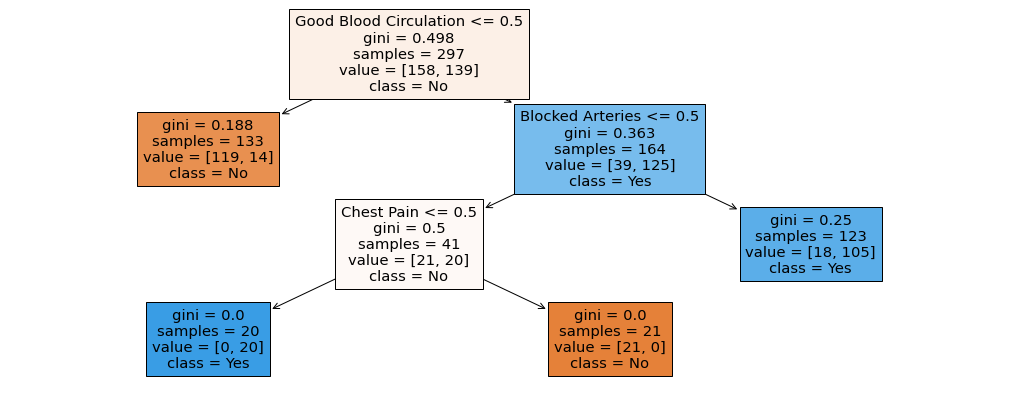

In [4]:
X = data[['Chest Pain','Good Blood Circulation','Blocked Arteries']]
y= data[['Heart Disease']]

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

fig = plt.figure(figsize=(18,7))
_ = tree.plot_tree(model, feature_names = X.columns, class_names = ['No', 'Yes'], filled = True)